# Chapter 9. Functions

## Functions in theory

In [1]:
import numpy as np


def cross_entropy_loss(X, y):
    """
    Args:
        X: numpy.ndarray of shape (n_batch, n_dim).
            Contains the predictions in form of a probability distribution.
        y: numpy.ndarray of shape (n_batch, 1).
            Contains class labels for each data point in X.
        
    Returns:
        loss: numpy.float. 
            Cross entropy loss of the predictions.
    """
    
    exp_x = np.exp(X)
    probs = exp_x / np.sum(exp_x, axis=1, keepdims=True)
    log_probs = - np.log([probs[i, y[i]] for i in range(len(probs))])
    loss = np.mean(log_probs)
    
    return loss

### Mental models of functions

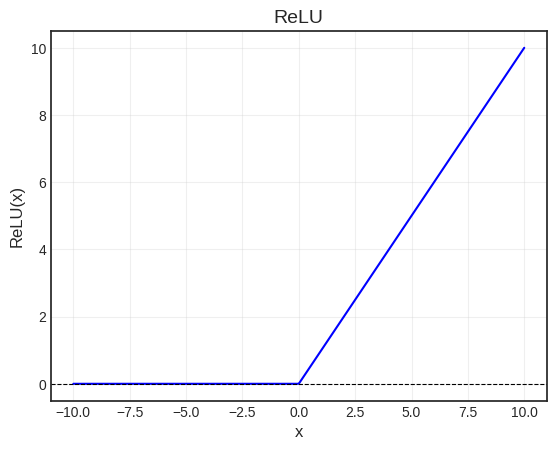

In [2]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-10, 10, 400)
relu = np.maximum(0, x)


with plt.style.context("seaborn-v0_8-white"):
    plt.figure()
    plt.plot(x, relu, label="ReLU(x)", color="blue")
    plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
    plt.title("ReLU", fontsize=14)
    plt.xlabel("x", fontsize=12)
    plt.ylabel("ReLU(x)", fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

## Functions in practice    

In [3]:
def square(x):
    return x**2

In [4]:
type(square)

function

In [5]:
square(12)

144

### Operations on functions

In [6]:
def cube(x):
    return x**3

In [7]:
x = 2

square(x) + cube(x)    # addition

12

In [8]:
square(x)*cube(x)      # multiplication

32

In [9]:
square(cube(x))        # composition

64

In [10]:
def compose(f, g):
    
    def composition(*args, **kwargs):
        return f(g(*args, **kwargs))
    
    return composition

In [11]:
square_cube_composition = compose(square, cube)

square_cube_composition(2)

64

### Functions as callable objects

In [12]:
def linear(x, a, b):
    return a*x + b

In [13]:
class Linear:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def __call__(self, x):
        return self.a*x + self.b

In [14]:
f = Linear(2, -1) # this represents the function f(x) = 2*x - 1
f(2.1)

3.2

In [15]:
f.a, f.b

(2, -1)

In [16]:
class Linear:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def __call__(self, x):
        return self.a*x + self.b
    
    def parameters(self):
        return {"a": self.a, "b": self.b}

In [17]:
f = Linear(2, -1)
f.parameters()

{'a': 2, 'b': -1}

In [18]:
f

In [19]:
class Linear:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def __call__(self, x):
        return self.a*x + self.b
    
    def __repr__(self):
        return f"Linear(a={self.a}, b={self.b})"
    
    def parameters(self):
        return {"a": self.a, "b": self.b}

In [20]:
f = Linear(2, -1)

In [21]:
f

Linear(a=2, b=-1)

### The `Function` base class

In [22]:
class Function:
    def __init__(self):
        pass
    
    def __call__(self, *args, **kwargs):
        pass
    
    def parameters(self):
        return dict()

In [23]:
import numpy as np


class Sigmoid(Function):            # the parent class is explicitly declared
    def __call__(self, x):
        return 1/(1 + np.exp(-x))

In [24]:
sigmoid = Sigmoid()

In [25]:
sigmoid(2)

np.float64(0.8807970779778823)

In [26]:
sigmoid.parameters()

{}

### Composition in the object-oriented way

In [27]:
composed = compose(Linear(2, -1), Sigmoid())

In [28]:
composed(2)

np.float64(0.7615941559557646)

In [29]:
isinstance(composed, Function)

False

In [30]:
composed.parameters()

AttributeError: 'function' object has no attribute 'parameters'

In [31]:
class Composition(Function):
    def __init__(self, *functions):
        self.functions = functions
        
    def __call__(self, x):
        
        for f in reversed(self.functions):
            x = f(x)
            
        return x

In [32]:
composed = Composition(Linear(2, -1), Sigmoid())

In [33]:
composed(2)

np.float64(0.7615941559557646)

In [34]:
composed.parameters()

{}

In [35]:
isinstance(composed, Function)

True

## Problems

**Problem 4.** Following the example of the composition, implement

* the `add` function, taking $ f $ and $ g $, returning $ f + g $,
* the `mul` function, taking $ f $ and $ g $, returning $ f g $,
* and the `div` function, taking $ f $ and $ g $, returning $ f / g $.

## Solutions

**Problem 4.**

In [36]:
def add(f, g):
    
    def sum(*args, **kwargs):
        return f(*args, **kwargs) + g(*args, **kwargs)
    
    return sum